In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import mode
from sklearn.datasets import make_blobs, make_moons, load_digits
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
X, y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10], y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


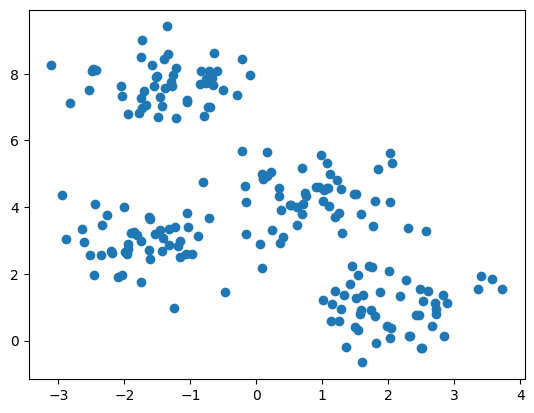

In [3]:
plt.scatter(X[:,0], X[:,1]);

In [4]:
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[ 0.86008475  4.31501411]
 [ 2.07464749  0.9869902 ]
 [-1.36512238  7.70188306]
 [-1.70639178  2.9104771 ]]


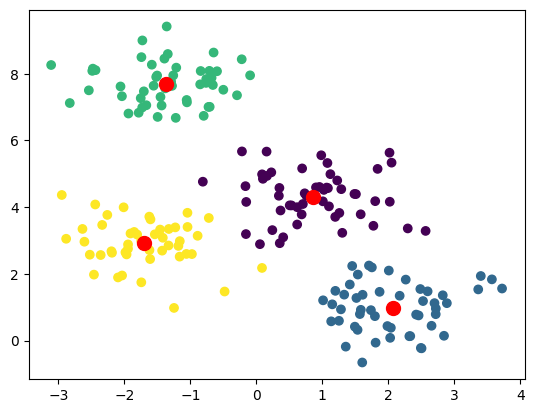

In [5]:
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red")

In [6]:
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.5


In [7]:
def find_permutation(n_clusters, real_labels, labels):
    permutation = []
    for i in range(n_clusters):
        idx = (labels == i)

        if np.sum(idx) > 0:
            cluster_labels = real_labels[idx]
            most_common_label = mode(cluster_labels, keepdims=True).mode[0]
            permutation.append(most_common_label)
        else:
            permutation.append(-1)
    return permutation

In [8]:
permutation = find_permutation(4, y, model.labels_)
print(permutation)

[0, 1, 3, 2]


In [9]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.99


In [10]:
X, y = make_moons(200, noise=0.05, random_state=0)

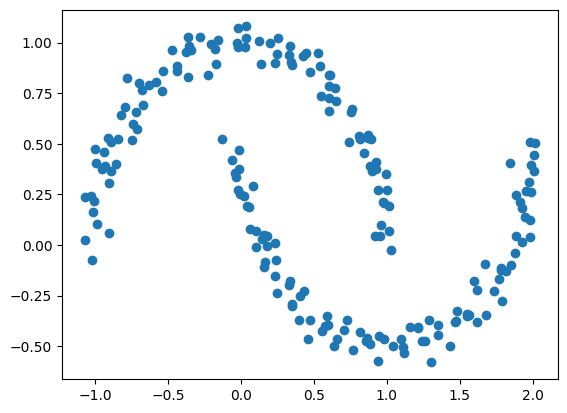

In [11]:
plt.scatter(X[:,0], X[:,1])

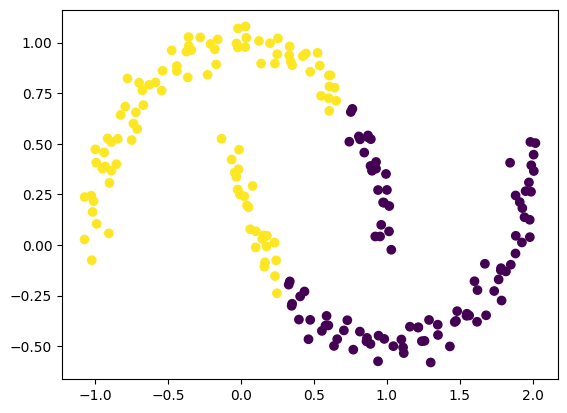

In [12]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

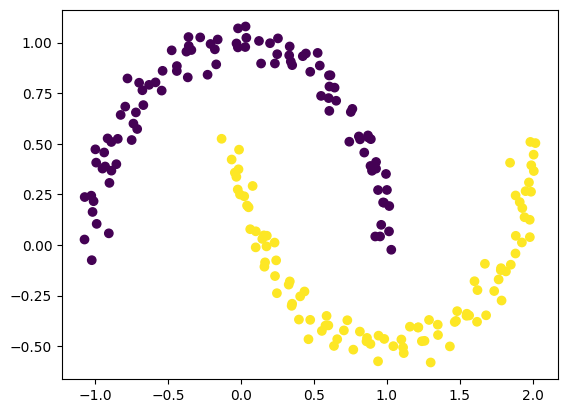

In [13]:
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

In [14]:
digits = load_digits()
digits.data.shape

(1797, 64)

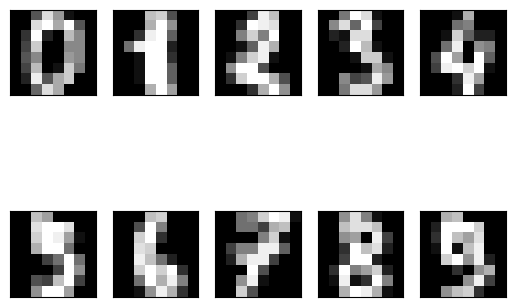

In [15]:
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, digits.data[:10]):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [16]:
model=KMeans(n_clusters = 10, random_state=0)
model.fit(digits.data)
model.cluster_centers_.shape

(10, 64)

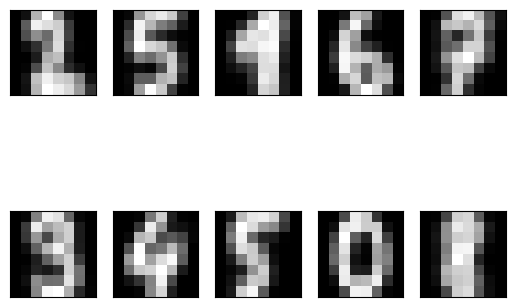

In [17]:
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, model.cluster_centers_):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [18]:
permutation3 = find_permutation(10, digits.target, model.labels_)
print(permutation3)
acc = accuracy_score(digits.target, [ permutation3[label] for label in model.labels_])
print("Accuracy score is", acc)

[2, 5, 1, 6, 7, 3, 4, 5, 0, 8]
Accuracy score is 0.7440178074568725


['setosa' 'versicolor' 'virginica']


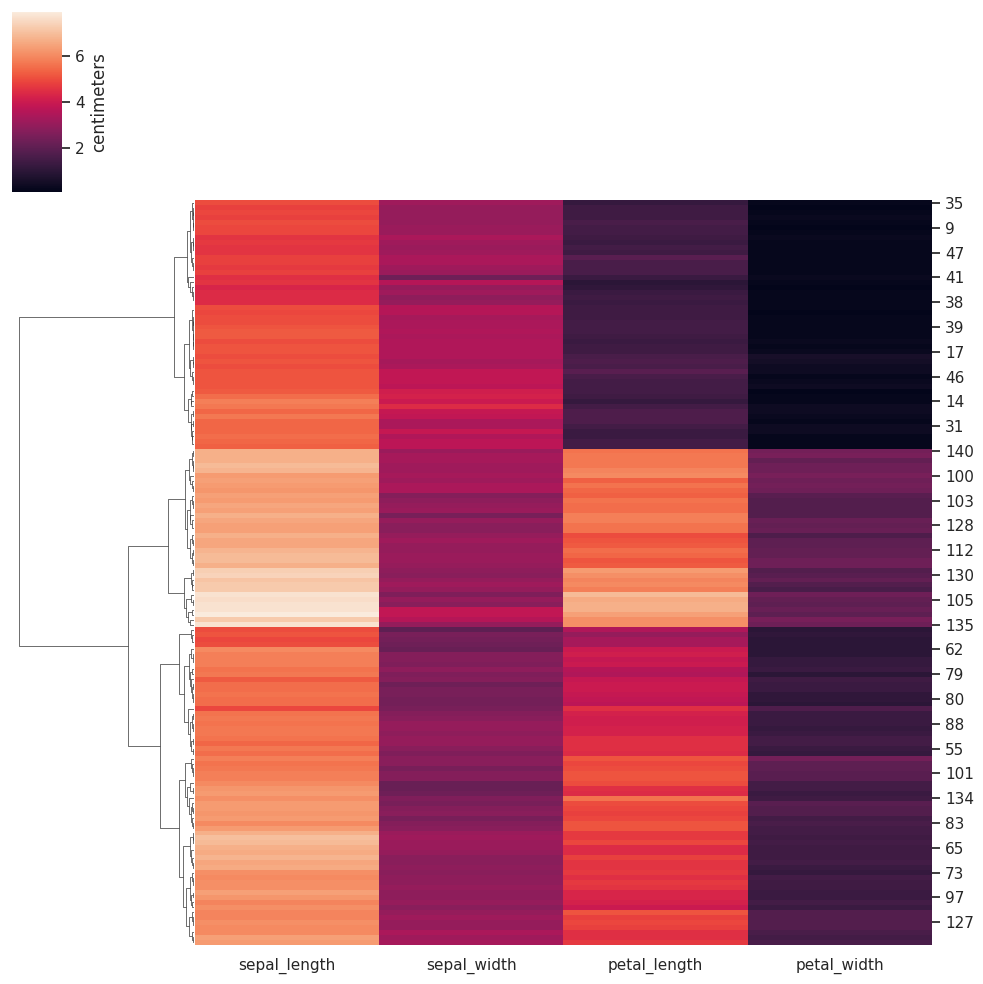

In [19]:
sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
print(species.unique())
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'})